<a href="https://colab.research.google.com/github/otome-rin/ensyu-2/blob/main/20241107_f0_energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install librosa numpy matplotlib fastdtw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512549 sha256=ef89d2f709d3f2ef392ba85b96390d73ed0657bf372cc6b6a1b87b3d6d711ba3
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [3]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

In [6]:
# 音声ファイルパス
audio_path1 = 'doraemon.mp3'
audio_path2 = 'similar01.mp3'
audio_path3 = 'similar02.mp3'
audio_path4 = 'similar03.mp3'
audio_path5 = 'differ01.mp3'
audio_path6 = 'differ02.mp3'
audio_path7 = 'obake.mp3'
audio_path8 = 'effect.mp3'

In [7]:
# 基本周波数を抽出する関数
def extract_f0_dtw(audio_path):
    # 音声データを読み込む
    y, sr = librosa.load(audio_path, sr=None)

    # ピッチを抽出
    pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr)

    # 基本周波数（F0）を取得
    f0 = []
    for t in range(pitches.shape[1]):
        index = magnitudes[:, t].argmax()  # 最大の強度を持つインデックスを取得
        pitch = pitches[index, t]
        if pitch > 0:  # 有効なピッチのみを使用
            f0.append(pitch)

    return f0 if f0 else 0  # 平均基本周波数を返す（データがない場合は0）

# 基本周波数の抽出
f0_audio_dtw1 = extract_f0_dtw(audio_path1)
f0_audio_dtw2 = extract_f0_dtw(audio_path2)
f0_audio_dtw3 = extract_f0_dtw(audio_path3)
f0_audio_dtw4 = extract_f0_dtw(audio_path4)
f0_audio_dtw5 = extract_f0_dtw(audio_path5)
f0_audio_dtw6 = extract_f0_dtw(audio_path6)
f0_audio_dtw7 = extract_f0_dtw(audio_path7)
f0_audio_dtw8 = extract_f0_dtw(audio_path8)
print("librosa.core.piptrackによる基本周波数の類似度")
distance_f0_1, path_fo_1 = fastdtw(f0_audio_dtw1, f0_audio_dtw2)
print('similar01：', distance_f0_1)
distance_f0_2, path_fo_2 = fastdtw(f0_audio_dtw1, f0_audio_dtw3)
print('similar02：', distance_f0_2)
distance_f0_3, path_fo_3 = fastdtw(f0_audio_dtw1, f0_audio_dtw4)
print('similar03：', distance_f0_3)
distance_f0_4, path_fo_4 = fastdtw(f0_audio_dtw1, f0_audio_dtw5)
print('differ01 ：', distance_f0_4)
distance_f0_5, path_fo_5 = fastdtw(f0_audio_dtw1, f0_audio_dtw6)
print('differ01 ：', distance_f0_5)
distance_f0_6, path_fo_6 = fastdtw(f0_audio_dtw1, f0_audio_dtw7)
print('obake    ：', distance_f0_6)
distance_f0_7, path_fo_7 = fastdtw(f0_audio_dtw1, f0_audio_dtw8)
print('effect   ：', distance_f0_7)

librosa.core.piptrackによる基本周波数の類似度
similar01： 123349.10070800781
similar02： 120389.0259399414
similar03： 100139.53009033203
differ01 ： 128608.49928283691
differ01 ： 87529.36047363281
obake    ： 260078.61640930176
effect   ： 135158.05041503906


In [8]:
def analyze_pitch_energy(audio_path):
    # Load the audio file
    y, sr = librosa.load(audio_path)

    # Calculate pitch (fundamental frequency)
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    pitch_values = []
    for t in range(pitches.shape[1]):
        index = magnitudes[:, t].argmax()  # Max magnitude index
        pitch = pitches[index, t]
        if pitch > 0:  # Only consider positive frequencies
            pitch_values.append(pitch)
        else:
            pitch_values.append(0)

    # Calculate energy (RMS)
    energy = librosa.feature.rms(y=y)[0]

    return pitch_values, energy

# Analyze pitch and energy for both audio files
pitch1, energy1 = analyze_pitch_energy(audio_path1)
pitch2, energy2 = analyze_pitch_energy(audio_path2)
pitch3, energy3 = analyze_pitch_energy(audio_path3)
pitch4, energy4 = analyze_pitch_energy(audio_path4)
pitch5, energy5 = analyze_pitch_energy(audio_path5)
pitch6, energy6 = analyze_pitch_energy(audio_path6)
pitch7, energy7 = analyze_pitch_energy(audio_path7)
pitch8, energy8 = analyze_pitch_energy(audio_path8)

In [9]:
print("librosa.piptrackによる基本周波数の類似度")
distance01, path01 = fastdtw(pitch1, pitch2)
print('similar01：', distance01)
distance02, path02 = fastdtw(pitch1, pitch3)
print('similar02：', distance02)
distance03, path03 = fastdtw(pitch1, pitch4)
print('similar03：', distance03)
distance04, path04 = fastdtw(pitch1, pitch5)
print('differ01 ：', distance04)
distance05, path05 = fastdtw(pitch1, pitch6)
print('differ02 ：', distance05)
distance06, path06 = fastdtw(pitch1, pitch7)
print('obake    ：', distance06)
distance07, path07 = fastdtw(pitch1, pitch8)
print('effect   ：', distance07)

librosa.piptrackによる基本周波数の類似度
similar01： 37701.035385131836
similar02： 59585.529556274414
similar03： 44922.75917053223
differ01 ： 50243.97589111328
differ02 ： 43746.3243560791
obake    ： 126207.80107116699
effect   ： 74653.10997009277


In [10]:
print("librosa.piptrackによるエネルギーの類似度")
distance11, path11 = fastdtw(energy1, energy2)
print('similar01：', distance11)
distance12, path12 = fastdtw(energy1, energy3)
print('similar02：', distance12)
distance13, path13 = fastdtw(energy1, energy4)
print('similar03：', distance13)
distance14, path14 = fastdtw(energy1, energy5)
print('differ01 ：', distance14)
distance15, path15 = fastdtw(energy1, energy6)
print('differ02 ：', distance15)
distance16, path16 = fastdtw(energy1, energy7)
print('obake    ：', distance16)
distance17, path17 = fastdtw(energy1, energy8)
print('effect   ：', distance17)

librosa.piptrackによるエネルギーの類似度
similar01： 12.911440995848771
similar02： 17.821843890334513
similar03： 30.680816405153983
differ01 ： 25.662597669091575
differ02 ： 27.409904151696047
obake    ： 27.34274805031415
effect   ： 34.642959794570025


In [11]:
# 基本周波数の類似度を計算する関数
def compare_pitch(y1, sr1, y2, sr2):
    # 音声の基本周波数（F0）を抽出
    Max_f0 = 500
    Min_f0 = 100
    f0_1, _, _ = librosa.pyin(y1, fmin = Min_f0, fmax = Max_f0)
    f0_2, _, _ = librosa.pyin(y2, fmin = Min_f0, fmax = Max_f0)

    # NaNを除去
    f0_1 = f0_1[~np.isnan(f0_1)]
    f0_2 = f0_2[~np.isnan(f0_2)]
    # fastdtwを使用して基本周波数の動的時間伸縮距離を計算
    distance, _ = fastdtw(f0_1, f0_2)
    return distance

# 抑揚（ピッチとエネルギー変動）の類似度を計算する関数
def compare_intonation(y1, sr1, y2, sr2):
    # ピッチ（F0）とエネルギー（RMS）の変動を抽出
    rms_1 = librosa.feature.rms(y=y1)[0]
    rms_2 = librosa.feature.rms(y=y2)[0]

    # ピッチとエネルギーの変動を一緒に比較
    #features_1 = np.vstack((f0_1, rms_1)).T
    #features_2 = np.vstack((f0_2, rms_2)).T

    # fastdtwを使用して抑揚の動的時間伸縮距離を計算
    distance, _ = fastdtw(rms_1, rms_2)
    return distance

# 2つの音声ファイルを読み込み、類似度を計算するメイン関数
def main(audio_path1, audio_path2):
    y1, sr1 = librosa.load(audio_path1)
    y2, sr2 = librosa.load(audio_path2)

    # 基本周波数の類似度
    pitch_similarity = compare_pitch(y1, sr1, y2, sr2)
    print(f"Pitch Similarity (F0): {pitch_similarity}")

    # 抑揚の類似度
    intonation_similarity = compare_intonation(y1, sr1, y2, sr2)
    print(f"Intonation Similarity (Energy): {intonation_similarity}")

# メイン関数の実行例

main(audio_path1, audio_path2)
main(audio_path1, audio_path3)
main(audio_path1, audio_path4)
main(audio_path1, audio_path5)
main(audio_path1, audio_path6)
main(audio_path1, audio_path7)
main(audio_path1, audio_path8)


Pitch Similarity (F0): 1169.9292852126293
Intonation Similarity (Energy): 12.911440995848771
Pitch Similarity (F0): 2216.5718128858925
Intonation Similarity (Energy): 17.821843890334513
Pitch Similarity (F0): 4344.833624886142
Intonation Similarity (Energy): 30.680816405153983
Pitch Similarity (F0): 4004.043987794996
Intonation Similarity (Energy): 25.662597669091575
Pitch Similarity (F0): 3758.721944956852
Intonation Similarity (Energy): 27.409904151696047
Pitch Similarity (F0): 0.0
Intonation Similarity (Energy): 27.34274805031415
Pitch Similarity (F0): 7312.779044745884
Intonation Similarity (Energy): 34.642959794570025


[3 0 0 ... 0 0 1]
The most common pitch is 0 Hz.
[0 0 0 ... 0 0 1]
The most common pitch is 807 Hz.


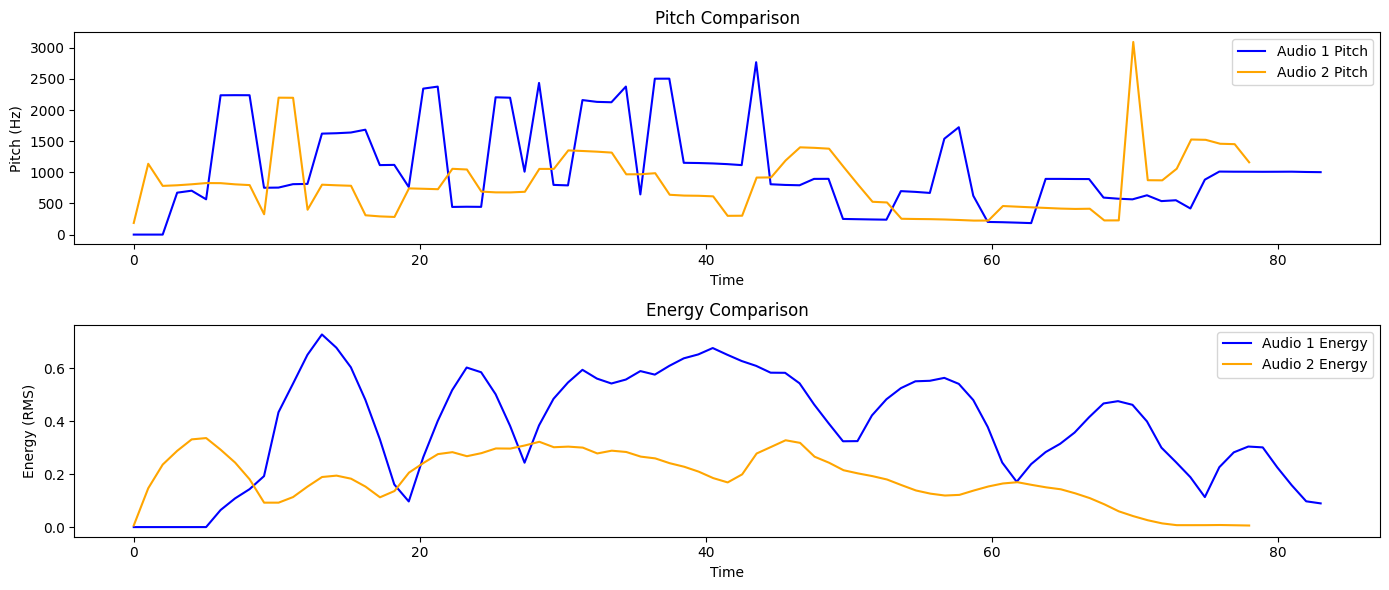

In [12]:
def analyze_pitch_energy(audio_path):
    # Load the audio file
    y, sr = librosa.load(audio_path)

    # Calculate pitch (fundamental frequency)
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    # ピッチ情報の取得
    #pitches = pitches[magnitudes > np.median(magnitudes)]
    pitch_values = []
    for t in range(pitches.shape[1]):
        index = magnitudes[:, t].argmax()  # Max magnitude index
        pitch = pitches[index, t]
        if pitch > 0:  # Only consider positive frequencies
            pitch_values.append(pitch)
        else:
            pitch_values.append(0)

    # Calculate energy (RMS)
    energy = librosa.feature.rms(y=y)[0]
    pitch_counts = np.bincount(pitch_values)
    print(pitch_counts)
    most_common_pitch = np.argmax(pitch_counts)
    print(f"The most common pitch is {most_common_pitch} Hz.")

    return pitch_values, energy

def plot_comparison(audio_path1, audio_path2):
    # Analyze pitch and energy for both audio files
    pitch1, energy1 = analyze_pitch_energy(audio_path1)
    pitch2, energy2 = analyze_pitch_energy(audio_path2)

    # Set up time axes for plotting
    times_pitch1 = np.linspace(0, len(pitch1), len(pitch1))
    times_pitch2 = np.linspace(0, len(pitch2), len(pitch2))
    times_energy1 = np.linspace(0, len(energy1), len(energy1))
    times_energy2 = np.linspace(0, len(energy2), len(energy2))

    # Plot pitch comparison
    plt.figure(figsize=(14, 6))
    plt.subplot(2, 1, 1)
    plt.plot(times_pitch1, pitch1, label="Audio 1 Pitch", color="blue")
    plt.plot(times_pitch2, pitch2, label="Audio 2 Pitch", color="orange")
    plt.title("Pitch Comparison")
    plt.xlabel("Time")
    plt.ylabel("Pitch (Hz)")
    plt.legend()

    # Plot energy comparison
    plt.subplot(2, 1, 2)
    plt.plot(times_energy1, energy1, label="Audio 1 Energy", color="blue")
    plt.plot(times_energy2, energy2, label="Audio 2 Energy", color="orange")
    plt.title("Energy Comparison")
    plt.xlabel("Time")
    plt.ylabel("Energy (RMS)")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage
plot_comparison(audio_path1, audio_path2)
# 最も頻繁に出現するピッチの音名を表示
